In [1]:

import pandas as pd
import numpy as np
import math as m
import collections
import os
import json
import csv
import seaborn as sns
import random as rn
from random import randint
from scipy.stats import beta
from matplotlib import pyplot as plt

# Seed folder path

dataset_name = "seed_2/p_1_beta"
dataset_folder_path = f"../models/{dataset_name}/readersourcing/"
ratings_filename = f"{dataset_folder_path}ratings.csv"
quantities_filename = f"{dataset_folder_path}quantities.json"
stats_filename = f"{dataset_folder_path}stats.csv"

ratings_dataframe = pd.read_csv(ratings_filename, header=None)
ratings_dataframe[ratings_dataframe.columns] = ratings_dataframe[ratings_dataframe.columns].convert_objects(convert_numeric=True)

stats_dataframe = ratings_dataframe.copy()
stats_dataframe[stats_dataframe > 0.0000001] = 1

with open(quantities_filename) as f:
   quantities = json.load(f)

papers = quantities[0]["Identifiers"]   
readers = quantities[2]["Identifiers"]   
authors = quantities[4]["Identifiers"]   
   
paper_steadiness = quantities[0]["Values"]
paper_score = quantities[1]["Values"]
reader_steadiness = quantities[2]["Values"]
reader_score = quantities[3]["Values"]
author_steadiness = quantities[4]["Values"]
author_score = quantities[5]["Values"]

print("---------- PRINTING PARSED RATING MATRIX (Part of it) ----------")
display(ratings_dataframe.head(10))

print("---------- PRINTING PARSED IDENTIFIERS ----------")
print("PAPER:  ", papers)
print("READER: ", readers)
print("AUTHOR: ", authors)

print("---------- PRINTING PARSED QUANTITIES ----------")
print("PAPER STEADINESS:  ", paper_steadiness)
print("PAPER SCORE:       ", paper_score)
print("READER STEADINESS: ", reader_steadiness)
print("READER SCORE:      ", reader_score)
print("AUTHOR STEADINESS: ", author_steadiness)
print("AUTHOR SCORE:      ", author_score)

FileNotFoundError: [Errno 2] File b'../models/seed_2/p_1_beta/readersourcing/ratings.csv' does not exist: b'../models/seed_2/p_1_beta/readersourcing/ratings.csv'

---------- STATS GENERATION STARTED ----------
MAX NUMBER OF RATINGS FOR A PAPER:  22
MIN NUMBER OF RATINGS FOR A PAPER:  4
MEAN NUMBER OF RATINGS FOR A PAPER:  13
NUMBER OF PAPERS WITH UNIQUE RATING:  0
Counter({30.0: 50, 90.0: 50, 2.0: 50, 8.0: 50, 4.0: 50})
        0
0    30.0
1    90.0
2    30.0
3     2.0
4    90.0
5     8.0
6    90.0
7     2.0
8     8.0
9     4.0
10    8.0
11    2.0
12    8.0
13    4.0
14    8.0
15    2.0
16   30.0
17   30.0
18    4.0
19   30.0
20   90.0
21   30.0
22   90.0
23    2.0
24   90.0
25    8.0
26    2.0
27    2.0
28    2.0
29    4.0
..    ...
220   2.0
221  30.0
222  30.0
223   4.0
224   8.0
225   4.0
226  90.0
227   8.0
228   4.0
229   8.0
230   8.0
231   8.0
232  30.0
233   2.0
234   8.0
235   4.0
236  90.0
237   2.0
238  90.0
239   2.0
240  30.0
241   2.0
242   2.0
243   8.0
244  90.0
245  90.0
246   8.0
247   8.0
248   8.0
249   4.0

[250 rows x 1 columns]
MAX NUMBER OF RATINGS FOR A READER:  90
MIN NUMBER OF RATINGS FOR A READER:  2
MEAN NUMBER OF R

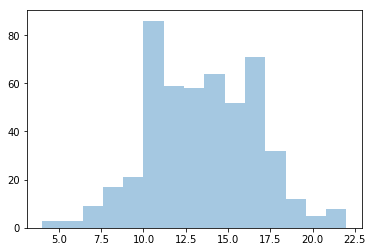

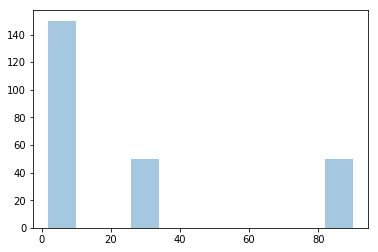

In [2]:

# stats file generation

print("---------- STATS GENERATION STARTED ----------")

sums_paper = stats_dataframe.copy().sum(axis=0)
sums_paper_dataframe = pd.DataFrame(sums_paper)

max_ratings_paper = sums_paper_dataframe.max()
min_ratings_paper = sums_paper_dataframe.min()
mean_ratings_paper = sums_paper_dataframe.mean(axis=0)

sns.distplot(sums_paper_dataframe, kde=False)
plt.show()

print("MAX NUMBER OF RATINGS FOR A PAPER: ", int(max_ratings_paper.values[0]))
print("MIN NUMBER OF RATINGS FOR A PAPER: ", int(min_ratings_paper.values[0]))
print("MEAN NUMBER OF RATINGS FOR A PAPER: ", int(mean_ratings_paper.values[0]))

ratings_dataframe = ratings_dataframe.T
counter = 0
for index, row in ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        counter+=1
        
print("NUMBER OF PAPERS WITH UNIQUE RATING: ", counter)

sums_reader = stats_dataframe.copy().sum(axis=1)
counter=collections.Counter(sums_reader)
print(counter)
sums_reader_dataframe = pd.DataFrame(sums_reader)

max_ratings_reader = sums_reader_dataframe.max()
min_ratings_reader = sums_reader_dataframe.min()
mean_ratings_reader = sums_reader_dataframe.mean(axis=1)

print("MAX NUMBER OF RATINGS FOR A READER: ", int(max_ratings_reader.values[0]))
print("MIN NUMBER OF RATINGS FOR A READER: ", int(min_ratings_reader.values[0]))
print("MEAN NUMBER OF RATINGS FOR A READER: ", int(mean_ratings_reader.values[0]))

ratings_dataframe = ratings_dataframe
counter = 0
for index, row in ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        counter+=1
        
print("NUMBER OF READERS WITH UNIQUE RATING: ", counter)

# Stats file generation

stats_dataframe = pd.DataFrame(columns=[
    "Dataset",
    "Max Number Rating Paper", 
    "Min Number Rating Paper", 
    "Mean Number Rating Paper",
    "Max Number Rating Reader", 
    "Min Number Rating Reader", 
    "Mean Number Rating Reader"
])
stats_dataframe = stats_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Max Number Rating Paper": int(max_ratings_paper.values[0]), 
        "Min Number Rating Paper": int(min_ratings_paper.values[0]), 
        "Mean Number Rating Paper": int(mean_ratings_paper.values[0]), 
        "Max Number Rating Reader": int(max_ratings_reader.values[0]), 
        "Min Number Rating Reader": int(min_ratings_reader.values[0]), 
        "Mean Number Rating Reader": int(mean_ratings_reader.values[0]), 
    }, ignore_index=True)
stats_dataframe.to_csv(stats_filename, index=False)

print("---------- STATS GENERATION COMPLETED ----------")